In [79]:
from catboost import CatBoostRegressor
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [80]:
df_train = pd.read_csv("elo_train.csv")

In [81]:
df_test = pd.read_csv("elo_test.csv")

In [72]:
df_train["avg_per_month_purchase"] = df_train["purchase_amount_total"] / (df_train["hist_purchase_date_diff"] / 30)
df_test["avg_per_month_purchase"] = df_test["purchase_amount_total"] / (df_test["hist_purchase_date_diff"] / 30)

In [82]:
df_train_columns = [c for c in df_train.columns if c not in ['card_id', 'first_active_month','target','outliers']]
target = df_train['target']
del df_train['target']

In [83]:
df_train.columns.tolist()

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_1',
 'feature_2',
 'feature_3',
 'hist_month_nunique',
 'hist_hour_nunique',
 'hist_weekofyear_nunique',
 'hist_dayofweek_nunique',
 'hist_year_nunique',
 'hist_subsector_id_nunique',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_var',
 'hist_installments_sum',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_mean',
 'hist_installments_var',
 'hist_season_sum',
 'hist_season_max',
 'hist_season_min',
 'hist_season_mean',
 'hist_season_var',
 'hist_weekofmonth_sum',
 'hist_weekofmonth_max',
 'hist_weekofmonth_min',
 'hist_weekofmonth_mean',
 'hist_weekofmonth_var',
 'hist_closest_date_to_holiday_sum',
 'hist_closest_date_to_holiday_max',
 'hist_closest_date_to_holiday_min',
 'hist_closest_date_to_holiday_mean',
 'hist_closest_date_to_holiday_var',

In [84]:
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.02,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100,
                             l2_leaf_reg = 14)

In [85]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train,df_train['outliers'].values)):
    print("fold {}".format(fold_))
#     trn_data = lgb.Dataset(df_train.iloc[trn_idx][df_train_columns], label=target.iloc[trn_idx])#, categorical_feature=categorical_feats)
#     val_data = lgb.Dataset(df_train.iloc[val_idx][df_train_columns], label=target.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 10000
    clf = model.fit(df_train.iloc[trn_idx][df_train_columns],y=target.iloc[trn_idx],
                    eval_set=(df_train.iloc[val_idx][df_train_columns],target.iloc[val_idx]),early_stopping_rounds = 100)
    oof[val_idx] = model.predict(df_train.iloc[val_idx][df_train_columns])
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = df_train_columns
    fold_importance_df["importance"] = clf.get_feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(df_test[df_train_columns]) / folds.n_splits

np.sqrt(mean_squared_error(oof, target))

fold 0


0:	learn: 3.8620414	test: 3.8758894	best: 3.8758894 (0)	total: 212ms	remaining: 3m 31s
75:	learn: 3.6645442	test: 3.7124255	best: 3.7124255 (75)	total: 15s	remaining: 3m 2s
150:	learn: 3.6051874	test: 3.6842258	best: 3.6842258 (150)	total: 30.1s	remaining: 2m 49s
225:	learn: 3.5699325	test: 3.6737735	best: 3.6737735 (225)	total: 45.8s	remaining: 2m 36s
300:	learn: 3.5431803	test: 3.6679962	best: 3.6679962 (300)	total: 1m 2s	remaining: 2m 24s
375:	learn: 3.5215056	test: 3.6645595	best: 3.6645595 (375)	total: 1m 17s	remaining: 2m 7s
450:	learn: 3.5014803	test: 3.6621206	best: 3.6621206 (450)	total: 1m 34s	remaining: 1m 55s
525:	learn: 3.4802207	test: 3.6596594	best: 3.6596594 (525)	total: 1m 52s	remaining: 1m 41s
600:	learn: 3.4618399	test: 3.6580643	best: 3.6580643 (600)	total: 2m 11s	remaining: 1m 26s
675:	learn: 3.4455049	test: 3.6570826	best: 3.6570408 (671)	total: 2m 31s	remaining: 1m 12s
750:	learn: 3.4305731	test: 3.6561554	best: 3.6560867 (748)	total: 2m 53s	remaining: 57.6s
825:

0:	learn: 3.8649866	test: 3.8636290	best: 3.8636290 (0)	total: 267ms	remaining: 4m 26s
75:	learn: 3.6664285	test: 3.7038273	best: 3.7038273 (75)	total: 29.8s	remaining: 6m 1s
150:	learn: 3.6037967	test: 3.6774031	best: 3.6774031 (150)	total: 59.1s	remaining: 5m 32s
225:	learn: 3.5708999	test: 3.6685102	best: 3.6685102 (225)	total: 1m 23s	remaining: 4m 46s
300:	learn: 3.5437052	test: 3.6635596	best: 3.6635596 (300)	total: 1m 47s	remaining: 4m 9s
375:	learn: 3.5204401	test: 3.6609651	best: 3.6609379 (373)	total: 2m 10s	remaining: 3m 36s
450:	learn: 3.4995596	test: 3.6594351	best: 3.6593914 (444)	total: 2m 33s	remaining: 3m 6s
525:	learn: 3.4804253	test: 3.6580053	best: 3.6580053 (525)	total: 2m 55s	remaining: 2m 38s
600:	learn: 3.4622488	test: 3.6565707	best: 3.6565707 (600)	total: 3m 16s	remaining: 2m 10s
675:	learn: 3.4478549	test: 3.6558556	best: 3.6557918 (655)	total: 3m 38s	remaining: 1m 44s
750:	learn: 3.4387599	test: 3.6557083	best: 3.6555687 (720)	total: 4m 2s	remaining: 1m 20s
8

0:	learn: 3.8626829	test: 3.8712110	best: 3.8712110 (0)	total: 238ms	remaining: 3m 57s
75:	learn: 3.6664239	test: 3.7076315	best: 3.7076315 (75)	total: 21.8s	remaining: 4m 25s
150:	learn: 3.6041979	test: 3.6801441	best: 3.6801441 (150)	total: 43.7s	remaining: 4m 5s
225:	learn: 3.5671049	test: 3.6699608	best: 3.6699608 (225)	total: 1m 7s	remaining: 3m 52s
300:	learn: 3.5361857	test: 3.6636826	best: 3.6636826 (300)	total: 1m 30s	remaining: 3m 29s
375:	learn: 3.5116719	test: 3.6605596	best: 3.6605160 (374)	total: 1m 51s	remaining: 3m 4s
450:	learn: 3.4881504	test: 3.6579626	best: 3.6579626 (450)	total: 2m 12s	remaining: 2m 41s
525:	learn: 3.4662290	test: 3.6562022	best: 3.6562022 (525)	total: 2m 33s	remaining: 2m 18s
600:	learn: 3.4466039	test: 3.6547448	best: 3.6547448 (600)	total: 2m 55s	remaining: 1m 56s
675:	learn: 3.4308195	test: 3.6539694	best: 3.6539694 (675)	total: 3m 16s	remaining: 1m 34s
750:	learn: 3.4159272	test: 3.6535303	best: 3.6535010 (749)	total: 3m 37s	remaining: 1m 12s


0:	learn: 3.8646106	test: 3.8638385	best: 3.8638385 (0)	total: 266ms	remaining: 4m 25s
75:	learn: 3.6639986	test: 3.7099960	best: 3.7099960 (75)	total: 23.9s	remaining: 4m 50s
150:	learn: 3.5997621	test: 3.6841339	best: 3.6841339 (150)	total: 47s	remaining: 4m 24s
225:	learn: 3.5658307	test: 3.6746510	best: 3.6746510 (225)	total: 1m 10s	remaining: 3m 59s
300:	learn: 3.5443989	test: 3.6704778	best: 3.6704773 (299)	total: 1m 31s	remaining: 3m 33s
375:	learn: 3.5229284	test: 3.6673900	best: 3.6673900 (375)	total: 1m 53s	remaining: 3m 8s
450:	learn: 3.5063018	test: 3.6657958	best: 3.6657958 (450)	total: 2m 14s	remaining: 2m 43s
525:	learn: 3.4877481	test: 3.6644540	best: 3.6644540 (525)	total: 2m 36s	remaining: 2m 21s
600:	learn: 3.4778716	test: 3.6637973	best: 3.6637594 (597)	total: 2m 57s	remaining: 1m 57s
675:	learn: 3.4662771	test: 3.6631469	best: 3.6631469 (675)	total: 3m 17s	remaining: 1m 34s
750:	learn: 3.4553834	test: 3.6624977	best: 3.6624977 (750)	total: 3m 38s	remaining: 1m 12s


0:	learn: 3.8679465	test: 3.8495725	best: 3.8495725 (0)	total: 239ms	remaining: 3m 58s
75:	learn: 3.6680135	test: 3.6957957	best: 3.6957957 (75)	total: 23s	remaining: 4m 39s
150:	learn: 3.6053181	test: 3.6722224	best: 3.6722224 (150)	total: 44.8s	remaining: 4m 11s
225:	learn: 3.5718321	test: 3.6649215	best: 3.6649215 (225)	total: 1m 6s	remaining: 3m 47s
300:	learn: 3.5423696	test: 3.6610626	best: 3.6610626 (300)	total: 1m 27s	remaining: 3m 23s
375:	learn: 3.5197689	test: 3.6579742	best: 3.6579742 (375)	total: 1m 48s	remaining: 3m
450:	learn: 3.4968516	test: 3.6564355	best: 3.6564355 (450)	total: 2m 9s	remaining: 2m 37s
525:	learn: 3.4733771	test: 3.6557360	best: 3.6555318 (502)	total: 2m 31s	remaining: 2m 16s
600:	learn: 3.4540923	test: 3.6546998	best: 3.6546998 (600)	total: 2m 52s	remaining: 1m 54s
675:	learn: 3.4376364	test: 3.6536919	best: 3.6536129 (663)	total: 3m 13s	remaining: 1m 32s
750:	learn: 3.4225246	test: 3.6537111	best: 3.6534605 (740)	total: 3m 33s	remaining: 1m 10s
825:	

3.6546837889680543

/Users/raghavan/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


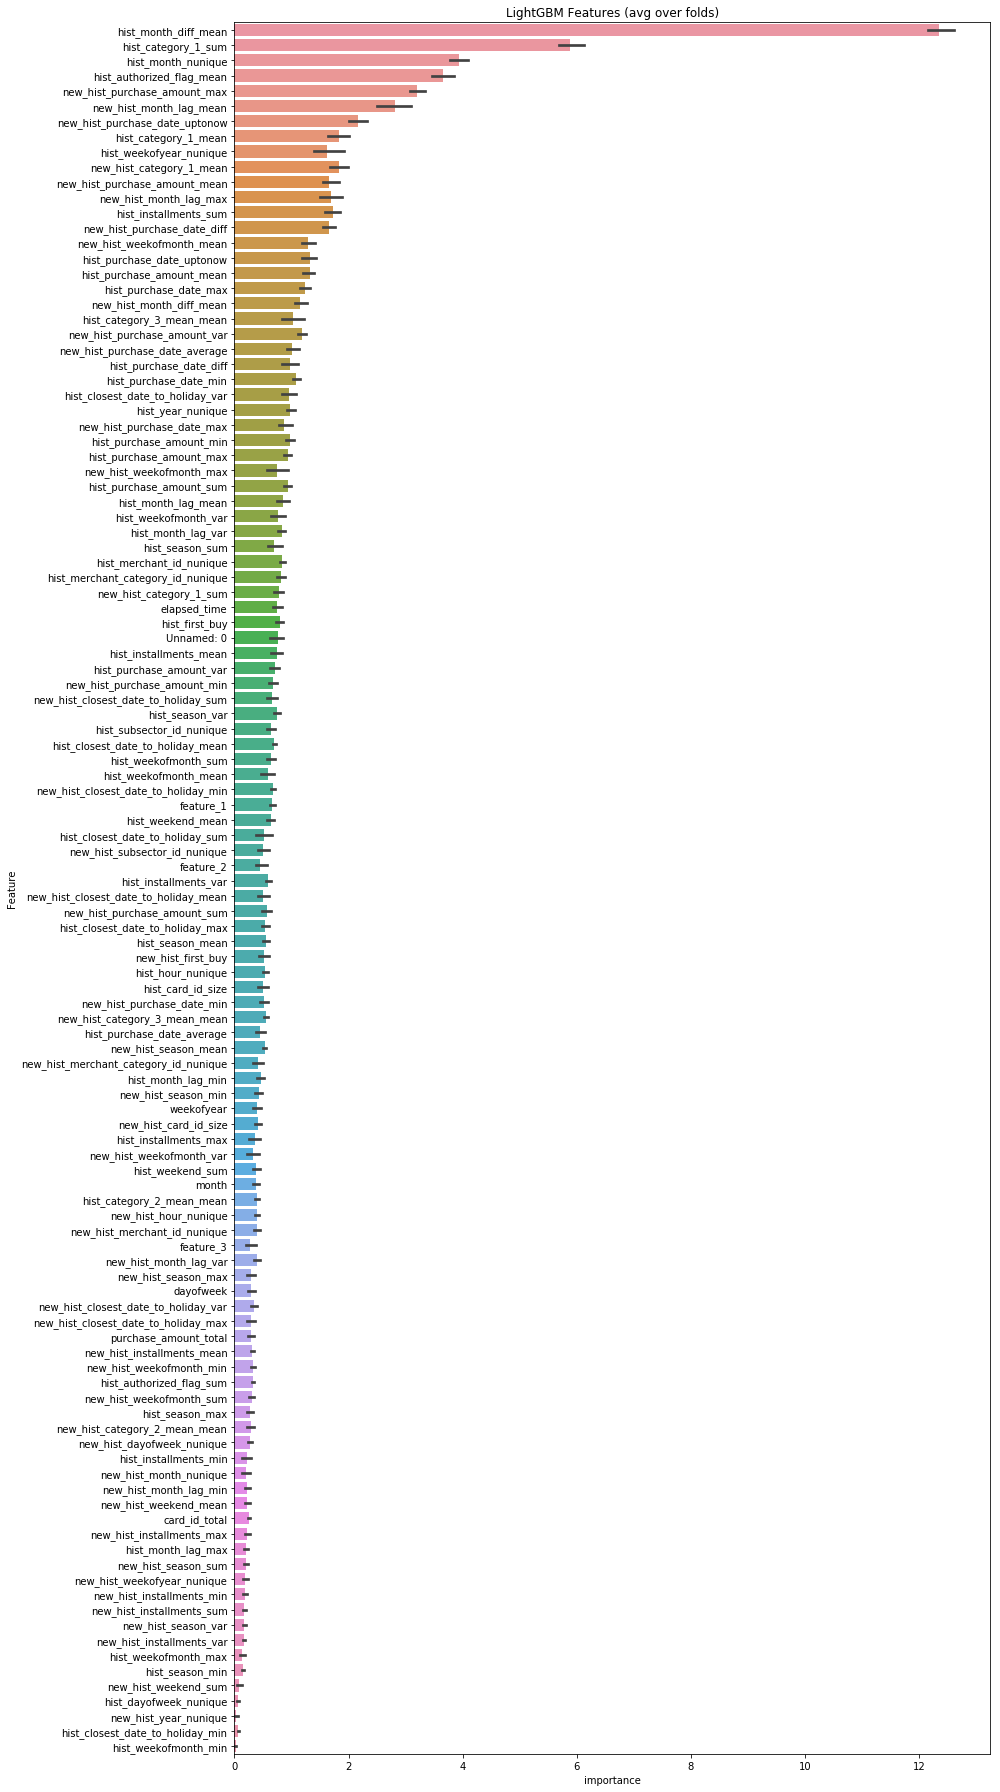

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="Feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')


In [87]:
sub_df = pd.DataFrame({"card_id":df_test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission_cat_boost_v3_with_week_of_month.csv", index=False)